# Dividir el dataset en conjunto de entrenamiento y de testing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../datasets/ads/Advertising.csv")

In [3]:
a = np.random.randn(len(data))

(array([ 1.,  4., 10., 19., 24., 48., 37., 24., 24.,  9.]),
 array([-3.138088  , -2.61013445, -2.08218089, -1.55422734, -1.02627379,
        -0.49832024,  0.02963331,  0.55758686,  1.08554042,  1.61349397,
         2.14144752]),
 <a list of 10 Patch objects>)

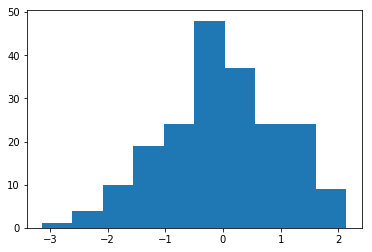

In [4]:
plt.hist(a)

In [6]:
check = (a < 0.8)
training = data[check]
testing = data[~check]

In [7]:
len(training), len(testing)

(155, 45)

In [9]:
import statsmodels.formula.api as smf
lm = smf.ols(formula="Sales~TV+Radio", data=training).fit()

In [10]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     656.5
Date:                Fri, 28 Jun 2019   Prob (F-statistic):           1.65e-75
Time:                        11:41:47   Log-Likelihood:                -300.06
No. Observations:                 155   AIC:                             606.1
Df Residuals:                     152   BIC:                             615.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6927      0.344      7.828      0.000       2.013       3.372
TV             0.0457      0.002     29.114      0.000       0.043       0.049
Radio          0.1944      0.009     20.985      0.000       0.176       0.213
==============================================================================
Omnibus:                       51.506   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.824
Skew:                          -1.337   Prob(JB):                     2.63e-31
Kurtosis:                       6.829   Cond. No.                         437.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sales = 2.6927 + 0.0457 * TV + 0.1944 * Radio

## Validación del modelo con el conjunto de testing

In [11]:
sales_pred = lm.predict(testing)
sales_pred

5      12.595284
13      8.623267
23     16.405228
25     15.380868
36     23.397097
40     16.276481
46      8.714081
54     20.289558
59     18.050550
65      7.651990
67     11.873685
68     18.881298
73      9.710960
77     13.736331
79      9.487683
80     11.372201
84     20.802575
86     11.523138
91      4.290574
93     21.247328
96     12.398323
98     24.146905
100    13.686555
105    18.010477
107     6.880001
117     6.337748
123    15.040805
124    19.453496
129     7.747477
136    11.442816
139    19.671227
143     8.578233
148    12.261874
149     9.749377
160    14.089848
162    14.816072
164    10.903155
166    10.818990
170     7.231250
179    12.200213
183    24.187055
186     9.472503
189     5.898829
193    18.475196
199    14.965434
dtype: float64

In [12]:
SSD = sum((testing["Sales"]-sales_pred)**2)
SSD

124.51159057499893

In [14]:
RSE = np.sqrt(SSD/(len(testing)-2-1))
RSE

1.7217902544610704

In [15]:
sales_m = np.mean(testing["Sales"])
error = RSE/sales_m
error

0.12355375769534076